# Úkoly 
1. vykreslete grafy prvních 5 Legendrových polynomů na intervalu [-1,1]

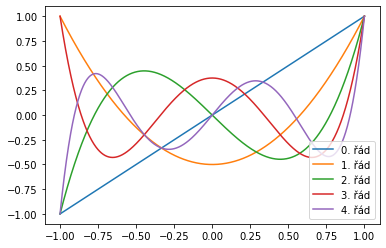

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as sps

x = np.linspace(-1, 1, 1001)

for i in range(5):
    plt.plot(x, sps.legendre(i + 1)(x), label=f"{i}. řád")

plt.legend()

2. Vyrobte sparse matici o rozměrech $n^2\times n^2$. Tato matice reprezentuje pravidelnou čtvercovou síť o velikosti $n \times n$. Každá buňka této čtvercové sítě odpovídá jednomu řádku/sloupci matice, přičemž pořadí buněk čtvrtcové sítě berte po řádcích (viz obrázek níže). Hodnoty v matici budou řízeny jedním parametrem $\varepsilon$, pro jednoduchost si místo něj představte $0.1$.
Nenulové hodnoty v matici jsou zadány sousedností buněk a to následovně:
    - hodnoty na diagonále (tedy sousednost prvku se sebou samým) jsou $1 + k \cdot \varepsilon$ (kde $k$ určuje počet sousedních buněk = 4 uvnitř, 3 na hranách, 2 v rozích)
    - mimodiagonální prvky mají hodnotu $-\varepsilon$, právě tehdy pokud index řádku a index sloupce mimodiagonálního prvku odpovídá sousedním buňkám ve čtvercové síti viz obrázek.

Ukázka jak přechází mřížka do matice pro $n=4$ a $\varepsilon = 0.1$ na následujícím obrázku:
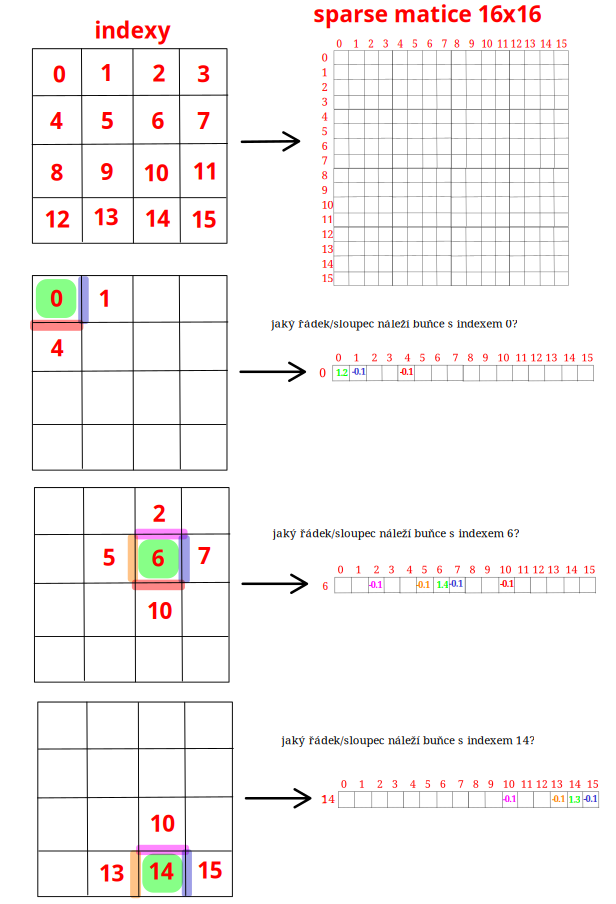


Sestavte matici pomocí formátu LIL a vyplňte hodnoty pomocí cyklu přes všechny buňky čtvercové sítě. Vznikne manice s následujícími vlastnostmi:
- velikost $n^2 \times n^2$
- $\varepsilon$ je parametr, který můžete nastavit, například $\varepsilon = 0.1$
- matice je symetrická, tj. $A = A^T$
- každý řádek/sloupec má maximálně 5 nenulových prvků
    - 5, pokud se jedná o buňku unvitř sítě
    - 4, pokud se jedná o buňku na okraji sítě
    - 3, pokud se jedná o buňku v rohu sítě
- výsledná matice je 5-ti diagonální (hlavní diagonála, dvě vedleší těsně pod a nad hlavní diagonálou, dvě vedleší diagonály ve vzdálenosti $\pm n$ od hlavní diagonály)

Pro $n=3$ a $\varepsilon = 0.1$ by měla matice (v plné formě) měla vypadat následovně:
```c
[[ 1.2 -0.1  0.  -0.1  0.   0.   0.   0.   0. ]
 [-0.1  1.3 -0.1  0.  -0.1  0.   0.   0.   0. ]
 [ 0.  -0.1  1.2  0.   0.  -0.1  0.   0.   0. ]
 [-0.1  0.   0.   1.3 -0.1  0.  -0.1  0.   0. ]
 [ 0.  -0.1  0.  -0.1  1.4 -0.1  0.  -0.1  0. ]
 [ 0.   0.  -0.1  0.  -0.1  1.3  0.   0.  -0.1]
 [ 0.   0.   0.  -0.1  0.   0.   1.2 -0.1  0. ]
 [ 0.   0.   0.   0.  -0.1  0.  -0.1  1.3 -0.1]
 [ 0.   0.   0.   0.   0.  -0.1  0.  -0.1  1.2]]
 ```


In [57]:
import scipy.sparse as sparse

n = 3
epsilon = 1e-1
A = sparse.lil_matrix((n * n, n * n))

for i in range(n**2):
    A[i, i] = 1
    if i // n > 0:
        A[i, i - n] = -epsilon
        A[i, i] += epsilon
    if i // n < n - 1:
        A[i, i + n] = -epsilon
        A[i, i] += epsilon
    if i % n > 0:
        A[i, i - 1] = -epsilon
        A[i, i] += epsilon
    if i % n < n - 1:
        A[i, i + 1] = -epsilon
        A[i, i] += epsilon

print(A.todense())

[[ 1.2 -0.1  0.  -0.1  0.   0.   0.   0.   0. ]
 [-0.1  1.3 -0.1  0.  -0.1  0.   0.   0.   0. ]
 [ 0.  -0.1  1.2  0.   0.  -0.1  0.   0.   0. ]
 [-0.1  0.   0.   1.3 -0.1  0.  -0.1  0.   0. ]
 [ 0.  -0.1  0.  -0.1  1.4 -0.1  0.  -0.1  0. ]
 [ 0.   0.  -0.1  0.  -0.1  1.3  0.   0.  -0.1]
 [ 0.   0.   0.  -0.1  0.   0.   1.2 -0.1  0. ]
 [ 0.   0.   0.   0.  -0.1  0.  -0.1  1.3 -0.1]
 [ 0.   0.   0.   0.   0.  -0.1  0.  -0.1  1.2]]


3. sestavte matici $A$ z předchozího úkolu bez použití cyklů. Sestavte nejprve vektory indexů řádků, sloupců a hodnot pro všechny nenulové prvky matice. Poté sestavte sparse matici ve formátu CSR najednou z těchto tří polí. Hint, jak na to: 
    - Sestavte tři pole: `row`, `col` a `data`, které obsahují řádky, sloupce a hodnoty nenulových prvků matice 
        - separátně sestavte příspěvky které vzniknou konektivitou na vnitřních horizontálních hranách a na vnitřních vertikálních hranách.
            - při procházení všech vnitřních horizontálních hran si rozmyslete jaké jsou vždy indexy nad a pod hranou (toto jsou souřadnice řádků a sloupců nenulových prvků)
            - totéž pro vnitřní vertikální hrany zde se může hodit `np.arange(n * n).reshape((n, n)).T.flatten()` což vytvoří vektor s přeházenými indexy (tedy indexy buněk uspořádané po sloupcích)
        - zvlášť sestavte příspevky pro mimodiagonální prvky a diagonální prvky.
            - u diagonálních prvků, nejprve vyrobte vektor hodnot $1+ 4\cdot \varepsilon$ a pak pro každou hranu odečtěte $\varepsilon$.
    - Tyto pole vytvořte vektorizovaně - bez cyklů

In [43]:
n = 3
h_up = np.arange(n**2 - n)
h_low = np.arange(n, n**2)

print(h_up, h_low, sep="\n")

index_matrix_vertical = np.arange(n * n).reshape((n, n)).T.flatten() 

print(index_matrix_vertical[n:], index_matrix_vertical[:-n], sep="\n")

[0 1 2 3 4 5]
[3 4 5 6 7 8]
[1 4 7 2 5 8]
[0 3 6 1 4 7]


In [42]:
# create matrix A using vectorized operations, creating indices for rows and columns and data
# use sparse.csr_matrix((data, (i, j)))
import numpy as np
from scipy.sparse import csr_matrix

n = 3
epsilon = 0.1

def A_efficiently(n, epsilon):
    ## --- Mimodiagonální prvky
    # Vnitřní horizontální hrany
    horizontal_up_idx = np.arange(n**2 - n)# TODO - vytvořte indexy buněk nad hranou
    horizontal_low_idx = np.arange(n, n**2)# TODO - vytvořte indexy buněk pod hranou
    row_horizontal = np.hstack((horizontal_up_idx, horizontal_low_idx))# TODO - vytvořte indexy řádků pro vnitřní horizontální hrany
    col_horizontal = np.hstack((horizontal_low_idx, horizontal_up_idx))# TODO - vytvořte indexy sloupců pro vnitřní horizontální hrany
    data_horizontal = -epsilon * np.ones(2 * (n * n - n)) # data jsou vždy stejná


    # Vnitřní vertikální hrany
    index_matrix_vertical = np.arange(n * n).reshape((n, n)).T.flatten() # indexy buněk přeházené pro vertikální hranu
    vertical_left_idx = index_matrix_vertical[n:]   # TODO použijte index_matrix_vertical[...] pro vytvoření indexů buněk vlevo od hran
    vertical_right_idx = index_matrix_vertical[:-n] # TODO použijte index_matrix_vertical[...] pro vytvoření indexů buněk vpravo od hran
    row_vertical = np.hstack((vertical_left_idx, vertical_right_idx)) # TODO - vytvořte indexy řádků pro vnitřní vertikální hrany
    col_vertical = np.hstack((vertical_right_idx, vertical_left_idx))# TODO - vytvořte indexy sloupců pro vnitřní vertikální hrany
    data_vertical = -epsilon * np.ones(2 * (n * n - n)) # data jsou vždy stejná

    ## --- Diagonála (všechny prvky)
    diagonal_idx = np.arange(n * n)
    row_idx_diag = diagonal_idx
    col_idx_diag = diagonal_idx
    data_diag = (1 + 4 * epsilon) * np.ones(n * n)

    # odečteme epsilon pro každou z hran
    # horní hrana
    # TODO - odečtěte epsilon pro horní hranu
    # dolní hrana
    # TODO - odečtěte epsilon pro dolní hranu
    # levá hrana
    # TODO - odečtěte epsilon pro levou hranu
    # pravá hrana
    # TODO - odečtěte epsilon pro pravou hranu

    ## --- spojení všech vektorů a sestavení matice
    # spojíme všechny vnitřní hrany a diagonálu
    row = np.hstack((row_idx_diag, row_horizontal, row_vertical))
    col = np.hstack((col_idx_diag, col_horizontal, col_vertical))
    data = np.hstack((data_diag, data_horizontal, data_vertical))

    # vyrobíme matici
    A_efficiently = csr_matrix((data, (row, col)))# TODO - vytvořte matici v CSR formátu z dat, řádků a sloupců

    return A_efficiently

A = A_efficiently(n, epsilon)
print(A.todense())


[[ 1.4 -0.1  0.  -0.1  0.   0.   0.   0.   0. ]
 [-0.1  1.4 -0.1  0.  -0.1  0.   0.   0.   0. ]
 [ 0.  -0.1  1.4  0.   0.  -0.1  0.   0.   0. ]
 [-0.1  0.   0.   1.4 -0.1  0.  -0.1  0.   0. ]
 [ 0.  -0.1  0.  -0.1  1.4 -0.1  0.  -0.1  0. ]
 [ 0.   0.  -0.1  0.  -0.1  1.4  0.   0.  -0.1]
 [ 0.   0.   0.  -0.1  0.   0.   1.4 -0.1  0. ]
 [ 0.   0.   0.   0.  -0.1  0.  -0.1  1.4 -0.1]
 [ 0.   0.   0.   0.   0.  -0.1  0.  -0.1  1.4]]


4. Použijte matici $A$ z předchozích úkolů. Vytvořte (použijte níže vytvořený) vektor $b$ odpovídající čtvercové síti s nulami všude kromě malého čtverce uprostřed ($n/6$ okolo středu) s hodnotou 1. 
    - Vykreslete řešení $x$ systému $A \cdot x = b$ jako obrázek čtvercové sítě
    - Spočtěte a vizualizujte 3 vlastní vektory matice $A$ (vlastní vektory odpovídající největším vlastním hodnotám) - opět jako obrázek čtvercové sítě

(144,)


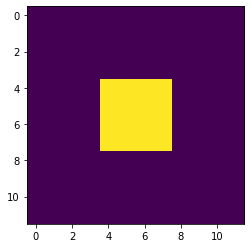

In [75]:
import matplotlib.pyplot as plt

n = 12
epsilon = 2e-1
A = A_efficiently(n, epsilon)

b = np.zeros((n, n))
b[n//2 - n//6:n//2 + n//6,n//2 - n//6:n//2 + n//6] = 1
b = b.flatten()
plt.imshow(b.reshape((n, n)))

(144,)


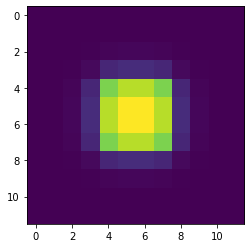

In [74]:
import scipy as sp
from scipy.sparse.linalg import spsolve

# TODO - vyřešte lineární rovnici A x = b a vykreselete výsledek
x = spsolve(A, b)
plt.imshow(x.reshape(n, n))

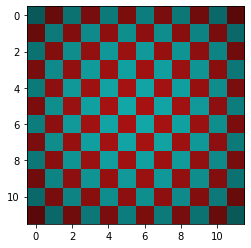

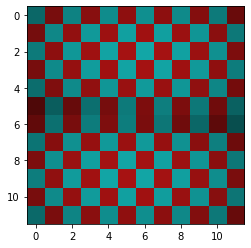

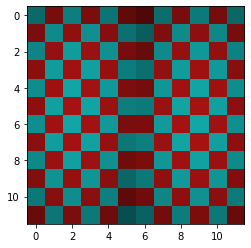

In [112]:
from colorsys import hls_to_rgb

# https://stackoverflow.com/a/20958684
def colorize(z):
    r = np.abs(z)
    arg = np.angle(z)

    h = (arg + sp.pi) / (2 * sp.pi) + 0.5
    l = 1.0 - 1.0 / (1.0 + r**0.3)
    s = 0.8

    c = np.vectorize(hls_to_rgb)(h, l, s)  # --> tuple
    c = np.array(c)  # -->  array of (3,n,m) shape, but need (n,m,3)
    c = c.swapaxes(0, 2)
    return c


# TODO - spočtěte a vykreslete vlastní vektory matice A
from scipy.sparse.linalg import eigs



for i, eig in enumerate(eigs(A, 3)[1].T):
    plt.figure(i)
    plt.imshow(colorize(eig.reshape(n, n)))


5. Nalezněte všechny kořeny Legendrova polynomu stupně 5 na intervalu $<-1,1>$

6. Pomocí SymPy nalezněte všechny kořeny Legendrova polynomu stupně 5. Použíjte `sympy.legendre()` pro vytvoření výrazu odpovídajícímu Legendrovu polynomu.
- porovnejte výsledky s předchozím úkolem

In [109]:
import sympy as sp

x = sp.Symbol('x')
legendre_5 = sp.legendre(5, x)
legendre_5


63*x**5/8 - 35*x**3/4 + 15*x/8